<a href="https://colab.research.google.com/github/karimqasim/MachineLearning/blob/master/ClassificationTree_BreastCancerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
df = pd.read_csv('data.csv')

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [8]:
print("Cancer data set dimensions : {}".format(df.shape))

Cancer data set dimensions : (569, 33)


We can observe that the data set contain 569 rows and 32 columns. ‘Diagnosis’ is the column which we are going to predict , which says if the cancer is M = malignant or B = benign. 

**Missing or Null Data points**

In [9]:
df.isnull().sum()
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

We are only using two features in our prediction model: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

In [0]:
df_final = df[['diagnosis', 'radius_mean', 'concave points_mean']]

In [11]:
df_final.head()

,diagnosis,radius_mean,concave points_mean
0,M,17.99,0.14710
1,M,20.57,0.07017
2,M,19.69,0.12790
3,M,11.42,0.10520
4,M,20.29,0.10430


In [12]:
df_final['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [0]:
X = df_final[['radius_mean', 'concave points_mean']]
y = df_final['diagnosis']

Number of Benign:  357
Number of Malignant :  212


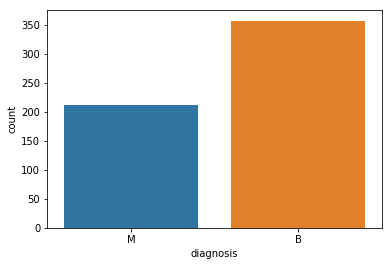

In [14]:
ax = sns.countplot(y,label="Count")      
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [15]:
X.describe()

,radius_mean,concave points_mean
count,569.000000,569.000000
mean,14.127292,0.048919
std,3.524049,0.038803
min,6.981000,0.000000
25%,11.700000,0.020310
50%,13.370000,0.033500
75%,15.780000,0.074000
max,28.110000,0.201200


## Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

['M' 'B' 'M' 'B' 'M']


Evaluate the model performance:

In [19]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


Note: Using only two features, the tree based model was able to achieve an accuracy of 86%!

## Using Entropy as a Criterion on entire dataset

In [20]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
list = ['Unnamed: 32','id','diagnosis']
Xdf = df.drop(list,axis = 1)
ydf = df['diagnosis']   

In [0]:
X_train, X_test, y_train, y_test = train_test_split(Xdf, ydf, test_size=0.2)

In [23]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

Now we will compare the accuracy of dt_entropy to the accuracy of another tree trained using the gini-index as the information criterion.

In [24]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [25]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred_entropy= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test,y_pred_entropy)

# Use dt_gini to predict test set labels
y_pred_gini= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test,y_pred_gini)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.9298245614035088
Accuracy achieved by using the gini index:  0.9210526315789473


Notice how the two models achieve almost the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.

## Hyperparamter Tuning

In [26]:
print(dt.get_params())

{'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 1, 'splitter': 'best'}


In [28]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters 'params_dt'
params_dt = {
             'max_depth': [3, 4, 5, 6],
             'min_samples_leaf': [0.04, 0.06, 0.08],
              'max_features': [0.2, 0.4, 0.6, 0.8]
            }


# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='accuracy',
                       cv=10,
                       n_jobs=-1)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=6,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'mi

In [30]:
# Extracting best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print("Best hyperparameters:\n", best_hyperparams)


Best hyperparameters:
 {'max_depth': 4, 'max_features': 0.4, 'min_samples_leaf': 0.04}


In [33]:
# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print("Best CV accuracy: {:.2f}".format(best_CV_score))

Best CV accuracy: 0.93


Similarly, the best-model can be extracted using the .best_estimator_ attribute. 
Note that this model is fitted on the whole training set because the refit parameter of GridSearchCV is set to True by default. 


In [34]:
# Extract best model from grid_dt
best_model = grid_dt.best_estimator_

#Evaluate test set accuracy
test_acc = best_model.score(X_test, y_test)

# Print test set accuracy
print("Test set accuracy for best model: {:.3f}".format(test_acc))

Test set accuracy for best model: 0.939


While the score of an untuned CART is 89%. 